# Problem statement
The Daily Buzz newspaper comany in sydney has started a new column called "The 
Weather Oracle," where they would predict the weather for the coming day.The Daily Buzz news paper is most widely read newspaper in sydney.They were well-known for their interesting articles and local news coverage. The editor-in-chief of "The Daily Buzz” wanted to improve the accuracy of their weather predictions by predicting rainfall accurately using machine learning techniques. It's a crucial task for a newspaper like "The Daily Buzz" as it enhances their service by providing reliable weather forecasts. By leveraging historical weather data and employing classification models, we aim to create a predictive model that aids in forecasting rainfall in Sydney.

### Q1: Your views about the problem statement?
The problem statement revolves around predicting rainfall accurately using machine learning techniques for "The Daily Buzz" newspaper in Sydney. This initiative aims to enhance the newspaper's service by providing reliable weather forecasts through a new column called "The Weather Oracle." Accurate weather predictions are crucial for planning activities and ensuring the safety of individuals, making this task essential for a widely read newspaper like "The Daily Buzz."

### Q2. What will be your approach to solving this task?
My approach would involve thorough data preprocessing, including handling missing values, outliers,converting categorical variables into numerical format,finding correlation between variables, variable trasformation and deletion of Non-usable variables.Following this, I'll explore a variety of classification models, train them on the preprocessed data, and evaluate their performance. This structured approach ensures the selection of the most effective model for predicting rainfall accurately.



### Q3: What were the available ML model options you had to perform this task?
1. Decision Tree Classifier<br>
2.
K-Nearest Neighbors<br>
3.
Random Forest Classifier <br>
4.
Gradient Boosting Classifier <br>
5.
Ada Boost classifier<br>
6.
Bagging classifier<br>

In [80]:
#import the required libraries
import pandas as pd

In [81]:
# Read CSV file into a DataFrame
df = pd.read_excel('C:\\Users\\paliw\\Downloads\\sydney_rain prediction.xlsx')

In [82]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [83]:
#converting categorical vairable into numerical format by replacing all yes as 1 and all No as 0.
df = df.replace('Yes', 1)
df = df.replace('No' ,0)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   float64 

In [85]:
#missing value treatment
columns_to_fill = ['MinTemp', 'MaxTemp','Rainfall','Evaporation', 'Sunshine', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','RainToday']

for column in columns_to_fill:
    # Calculate the mean value of the column
    mean_value = df[column].mean()
    
    # Fill missing values in the column with the mean value
    df[column].fillna(mean_value, inplace=True)



##### Note: we have not treated Cloud9am and Cloud3pm columns here as they seems to have more missing values let us first analyse their impact on target varible.

In [86]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,2771.000000,2776.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259982,0.259215
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,1.000000,1.000000,13.800000,18.400000,0.000000,0.000000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,5.000000,4.000000,18.200000,21.300000,0.000000,0.000000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.749578,2.641885,4.894240,4.301156,0.438296,0.438269


In [87]:
#dropping Location column as location is same for entire data so it will not impact accuracy of our model.
df = df.drop(columns=['Location'])


<Axes: >

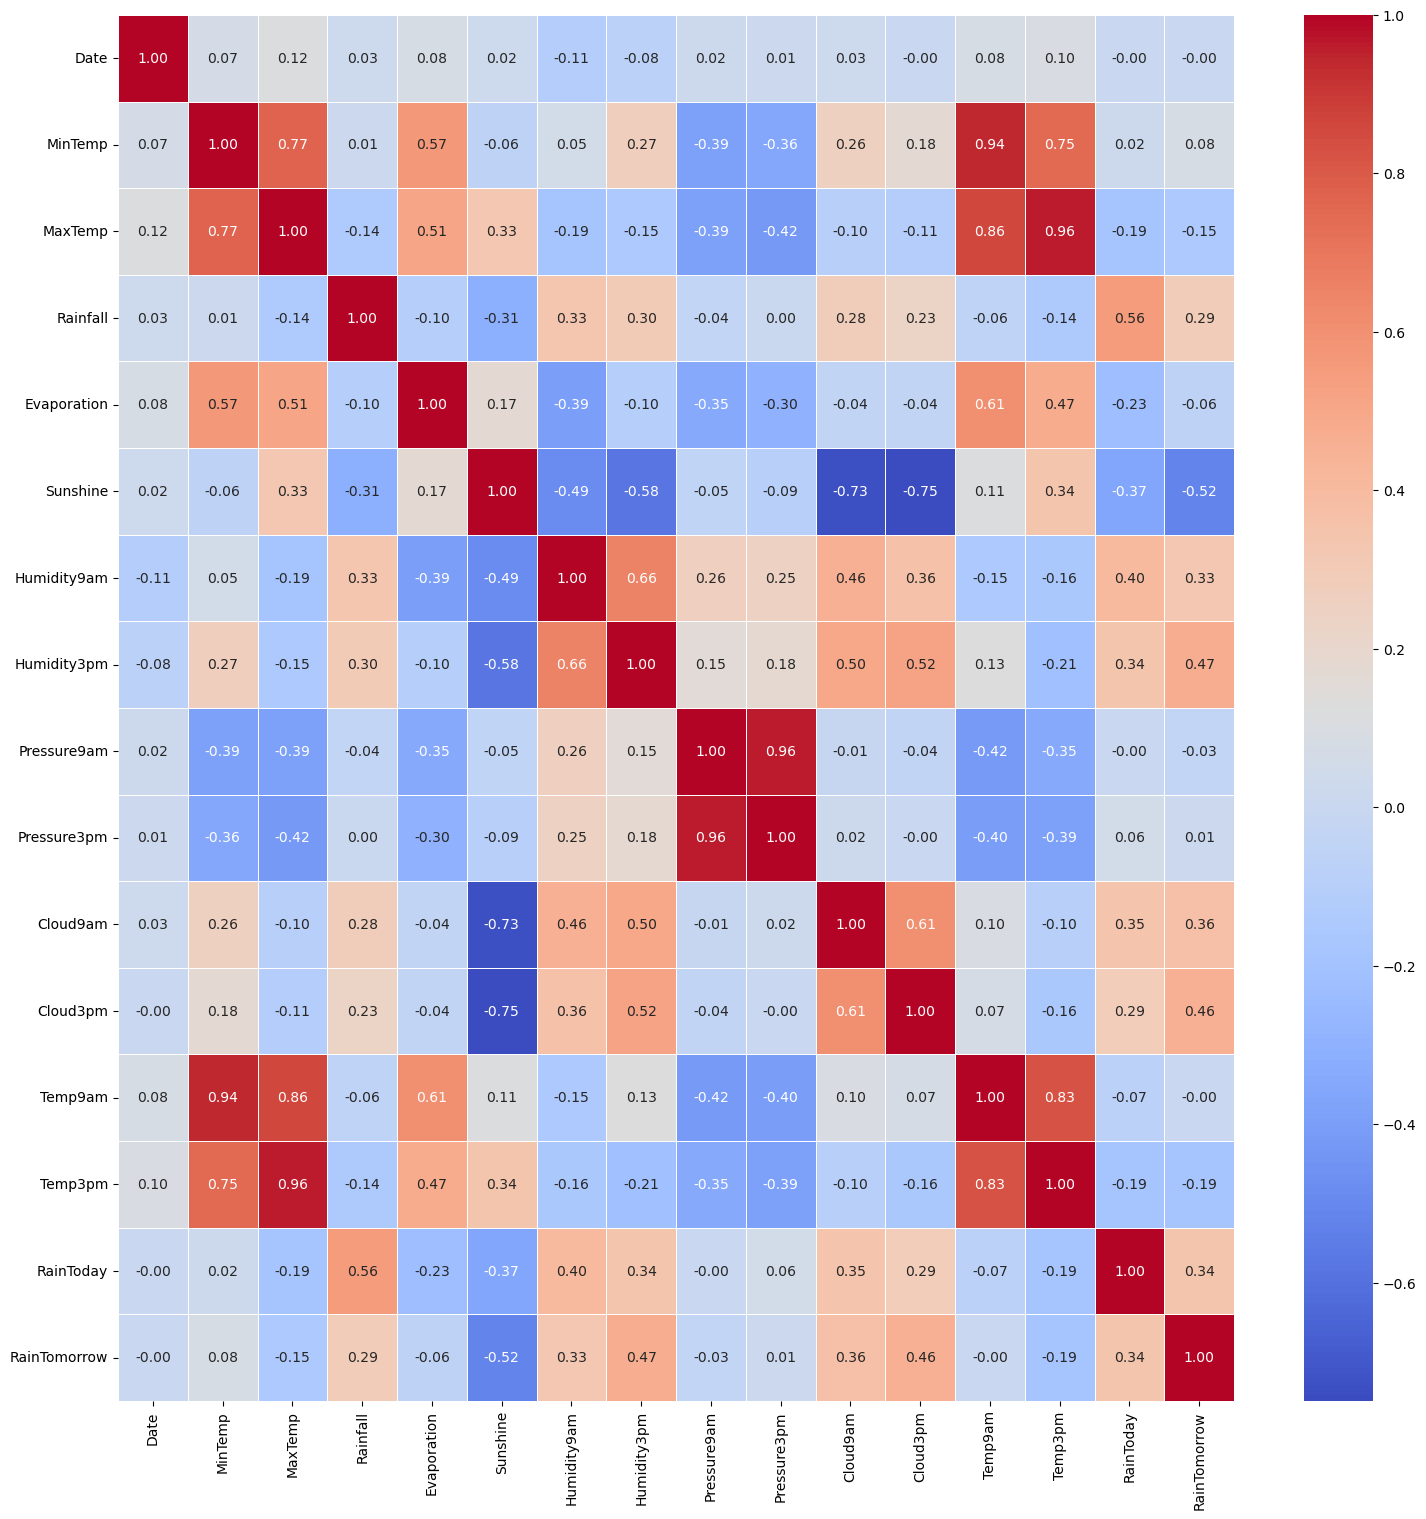

In [88]:
#let's plot heat map for correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()


# Plot correlation heatmap
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Observations from above correaltion matrix:


1. **Date Feature:** The date feature shows no significant correlation with the target variable, indicating it can be safely removed from the analysis.

2. **Sunshine and Cloud Cover:** The sunshine feature exhibits a high negative correlation with cloud cover variables (cloud 9am and cloud 3pm). Given their strong relationship and the business understanding that more sunshine implies fewer clouds, it's reasonable to drop these cloud cover columns.

3. **Temperature Features:** Max and min temperatures are highly correlated with temperature readings at 9 am and 3 pm. To simplify the model and capture the essence of temperature variation, it's proposed to retain only max and min temperatures while dropping the specific time readings.

4. **Humidity and Pressure:** Averaging the humidity readings at 9 am and 3 pm, as well as the pressure readings, can provide a more representative value for these features, potentially enhancing the model's predictive performance.

By implementing feature selection and transformation techniques, we can effectively enhance the relevance and efficiency of the model, ensuring it captures essential patterns and relationships in the data while minimizing redundancy.


In [89]:

# Remove the 'Date' feature
df.drop(columns=['Date'], inplace=True)

# Drop 'Cloud9am' and 'Cloud3pm' features
df.drop(columns=['Cloud9am', 'Cloud3pm'], inplace=True)

# Use only 'MinTemp' and 'MaxTemp' and drop 'Temp9am' and 'Temp3pm'
df.drop(columns=['Temp9am', 'Temp3pm'], inplace=True)

# Take an average of 'Humidity9am' and 'Humidity3pm'
df['AvgHumidity'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
df.drop(columns=['Humidity9am', 'Humidity3pm'], inplace=True)

# Take an average of 'Pressure9am' and 'Pressure3pm'
df['AvgPressure'] = (df['Pressure9am'] + df['Pressure3pm']) / 2
df.drop(columns=['Pressure9am', 'Pressure3pm'], inplace=True)

In [90]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,RainToday,RainTomorrow,AvgHumidity,AvgPressure
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,0.259982,0.259215,61.464084,1017.182465
std,4.551593,4.493290,9.886270,2.756095,3.801737,0.438296,0.438269,14.258961,6.936721
min,4.300000,11.700000,0.000000,0.000000,0.000000,0.000000,0.000000,15.500000,988.850000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,0.000000,0.000000,52.500000,1012.650000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,0.000000,0.000000,62.000000,1017.350000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,1.000000,1.000000,71.000000,1021.950000
max,27.600000,45.800000,119.400000,18.400000,13.600000,1.000000,1.000000,96.000000,1037.400000


After conducting Exploratory Data Analysis (EDA), we observed that the 'Sunshine' and 'MinTemp' data appear to be within reasonable ranges without any apparent issues. However, concerning 'MaxTemp', 'Rainfall', 'Evaporation', and 'AvgPressure', there is a substantial difference between the 75th percentile value and the maximum value, indicating potential outliers or skewness in the data. Additionally, for 'AvgHumidity', we noticed a significant difference between the minimum value and the 25th percentile value.
<br>
<br>
To dive deeper into these observations, we plan to generate box plots for these variables to visually inspect the distribution of data and identify any outliers or skewness. This analysis will provide us with insights into the data distribution and guide us in deciding appropriate data preprocessing steps.

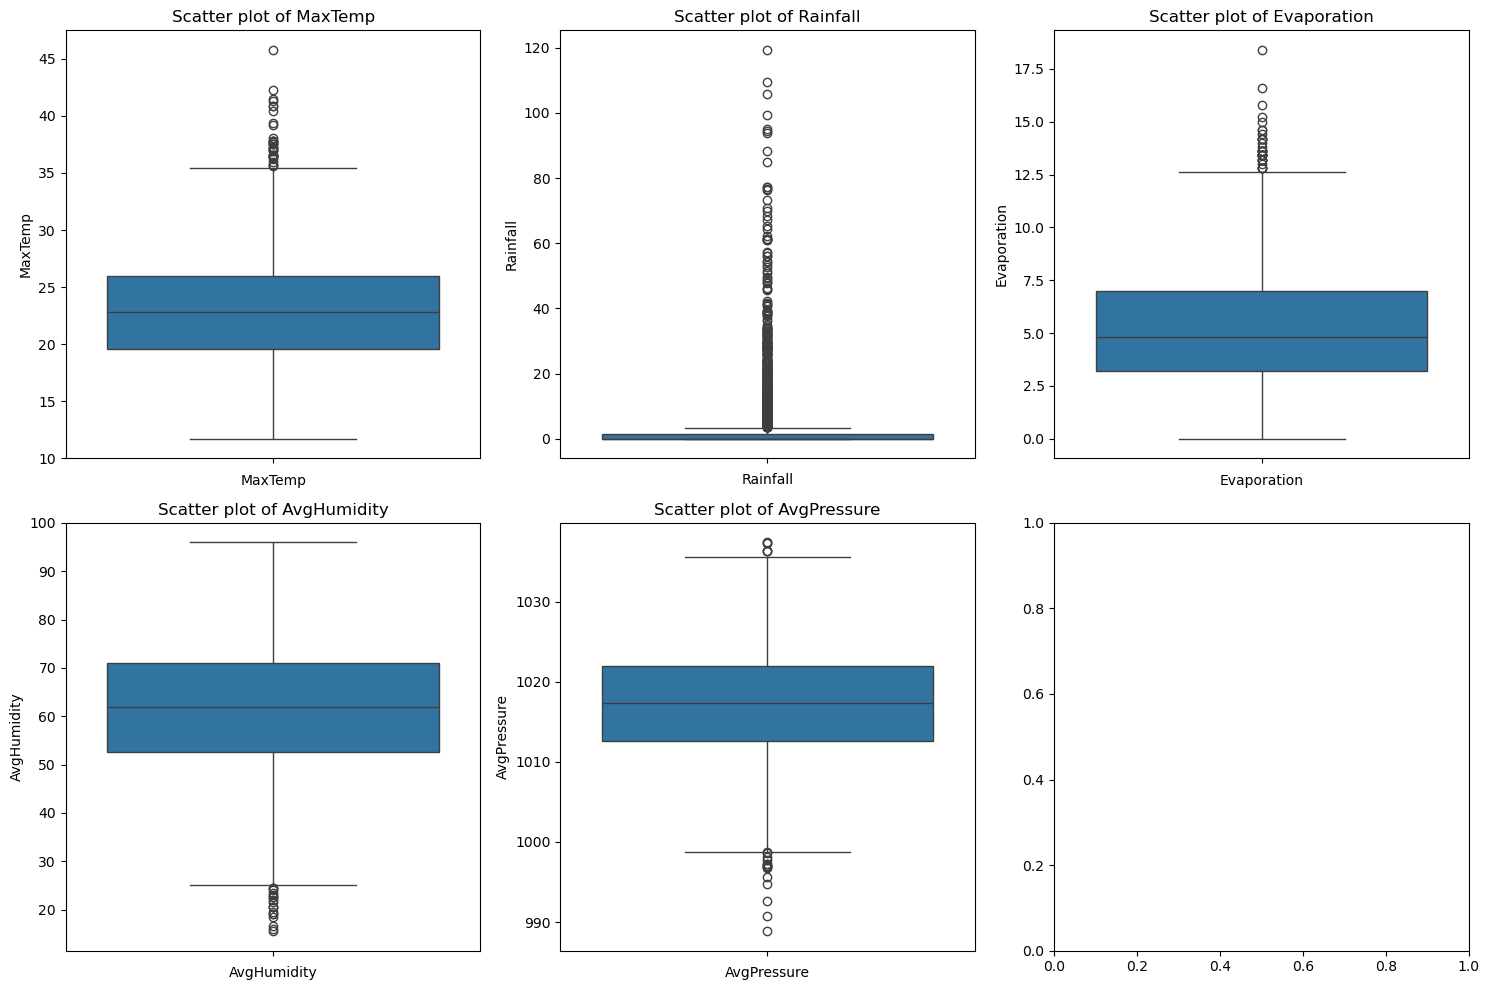

In [91]:
# Plot individual Box plots
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for plotting
features = ['MaxTemp','Rainfall','Evaporation','AvgHumidity','AvgPressure']

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes for easy iteration
axs = axs.flatten()

# Plot individual Box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df[feature], ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_title(f'Scatter plot of {feature}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##### Outlier treatment is crucial in data preprocessing because outliers can significantly impact the performance and accuracy of machine learning models.Here I am using capping method with value 0.01 for lower cap and 0.90 for upper cap this will reduce impact of outliers on data.

In [92]:

def treat_outliers(data, columns, lower_cap=0.01, upper_cap=0.98):
    treated_data = data.copy()
    for column in columns:
        # Calculate lower and upper bounds using percentiles
        lower_bound = treated_data[column].quantile(lower_cap)
        upper_bound = treated_data[column].quantile(upper_cap)
        
        # Cap outliers below the lower bound
        treated_data.loc[treated_data[column] < lower_bound, column] = lower_bound
        
        # Cap outliers above the upper bound
        treated_data.loc[treated_data[column] > upper_bound, column] = upper_bound
    
    return treated_data

# Define columns with outliers to be treated
outlier_columns =['MaxTemp','Rainfall','Evaporation','AvgHumidity','AvgPressure']

# Treat outliers in the specified columns
df = treat_outliers(df, outlier_columns)


##### lets Visualize the boxes plots again to check if we still have any outliers

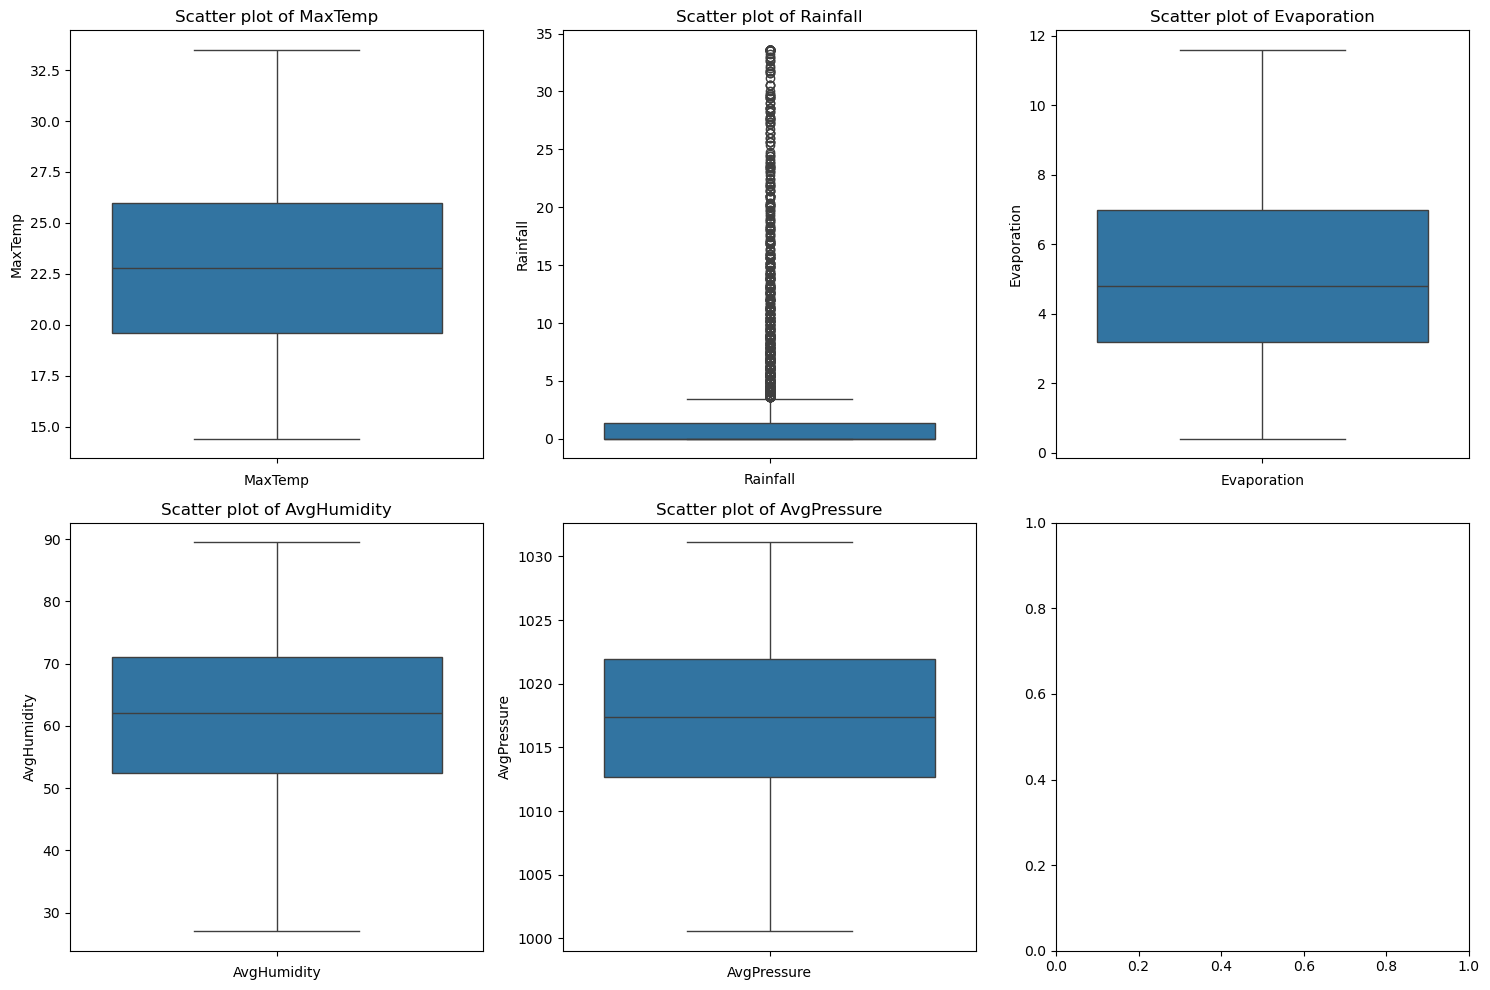

In [93]:
# Plot individual Box plots
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting features for plotting
features = ['MaxTemp','Rainfall','Evaporation','AvgHumidity','AvgPressure']

# Create a figure and axes
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the axes for easy iteration
axs = axs.flatten()

# Plot individual Box plots
for i, feature in enumerate(features):
    sns.boxplot(data=df[feature], ax=axs[i])
    axs[i].set_xlabel(feature)
    axs[i].set_title(f'Scatter plot of {feature}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

##### Rainfall column still have some outliers present. even after capping for 0.01 and .90 values So I decide to go ahead with these outliers as they are  significatly large and there is no relationship between them.I will try to use complex models that can handle outliers effectively.

<Axes: xlabel='RainToday', ylabel='count'>

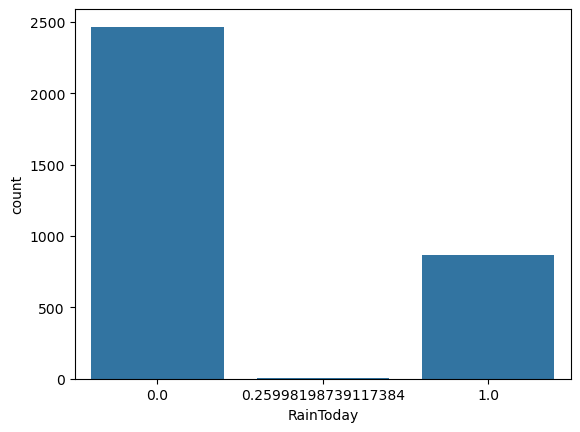

In [94]:
#lets plot countplot for our categorical column "RainToday"
sns.countplot(x="RainToday", data=df)

<Axes: xlabel='RainTomorrow', ylabel='count'>

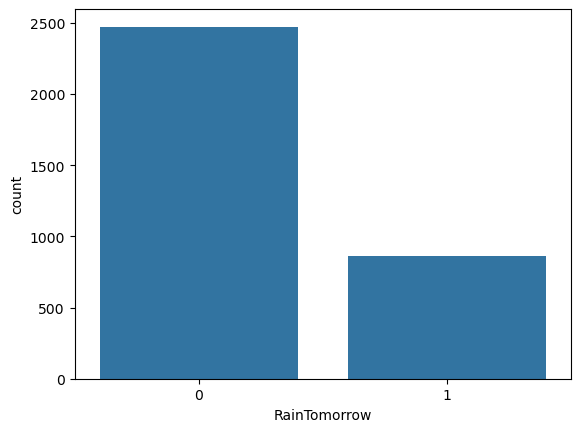

In [95]:
#lets plot countplot for our categorical column "RainTomorrow"
sns.countplot(x="RainTomorrow", data=df)

In [96]:
#defining our X(independent) and y(dependent) variables
X = df.drop(columns=['RainTomorrow'])  # Exclude the target variable column
y = df['RainTomorrow'] 

#### Train test split
The train-test split is essential for ensuring that your machine learning model is robust, reliable, and capable of making accurate predictions on unseen data. It enables you to evaluate the model's performance, detect overfitting, and assess its ability to generalize to new observations.

In [97]:
from sklearn.model_selection import train_test_split
#These sets are split according to the specified test size, with 80% of the data used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Machine learning models
Now we are ready with our preprocessed data to train machine learning algorithms and decide which algorithm works best for our problem statement.
I will here use some of the popular and effient machine learning models such as decision tree classifier and random forest calssifier and gradient boosting etc. After that we will compare performance of each model to analyse which model is best for us.


### DecisionTreeClassifier
A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [2, 4, 6],               # Depth of the tree
    'min_samples_split': [2, 4, 6],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 3, 6,]         # Minimum number of samples required at each leaf node
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
final_dt_model = DecisionTreeClassifier(**best_params)

# Train the final model
final_dt_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = final_dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_dt = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_dt)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2}
Accuracy: 0.781437125748503
0.7719022987857729

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       484
           1       0.63      0.49      0.55       184

    accuracy                           0.78       668
   macro avg       0.73      0.69      0.70       668
weighted avg       0.77      0.78      0.77       668



### K-Nearest Neighbors
K-Nearest Neighbors (KNN) is a versatile and straightforward supervised learning algorithm used for both classification and regression tasks. It's a non-parametric and instance-based learning algorithm, meaning it doesn't explicitly learn a model during training but instead memorizes the entire training dataset.


KNN is a simple yet effective algorithm suitable for small to medium-sized datasets with low to moderate dimensionality. However, its performance can be sensitive to the choice of hyperparameters and the quality of the training data.

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create a classifier
KNC =  KNeighborsClassifier()

# Define the hyperparameter grid
param_grid =  {'n_neighbors': [3, 5, 7]}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=KNC, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final model
final_knc_model = KNeighborsClassifier(**best_params)

# Train the final model
final_knc_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = final_knc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_knc = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_knc)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'n_neighbors': 7}
Accuracy: 0.7859281437125748
0.7794035439871365

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       484
           1       0.63      0.53      0.58       184

    accuracy                           0.79       668
   macro avg       0.73      0.71      0.72       668
weighted avg       0.78      0.79      0.78       668



### Random Forest:
Random Forest for classification builds a group of decision trees during training, each offering its classification. By combining the votes of these trees, it achieves accurate predictions, especially on complex data. It's robust against overfitting and provides insights into feature importance, aiding in feature selection.

Random Forest tends to produce more accurate predictions compared to individual decision trees, especially when dealing with complex datasets with non-linear relationships between features and the target variable. By aggregating the predictions of multiple trees, Random Forest reducesvariance and overfitting, leading to more robust models.Random Forest provides a measure of feature importance, indicating the relative importance of each feature in making predictions. This can be helpful for feature selection and understanding the underlying relationships in the data.

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [2,5,10],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf_cls = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(estimator=rf_cls, param_grid=param_grid, cv=3, n_jobs=-1,scoring ='f1')
grid_search.fit(X_train_s, y_train)

# Get the best model
best_rf_cls = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_rf_cls.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_rf = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_rf)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7979041916167665
0.785580853134502

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       484
           1       0.69      0.48      0.57       184

    accuracy                           0.80       668
   macro avg       0.76      0.70      0.72       668
weighted avg       0.79      0.80      0.79       668



### Gradient Boosting
Gradient Boosting is a machine learning technique that constructs an ensemble of decision trees sequentially, each tree correcting errors made by the previous ones. It works by fitting each tree to the residuals of the previous tree, gradually reducing the error and improving the overall model performance.

Gradient Boosting is particularly effective in handling heterogeneous data with a mix of numerical and categorical features, as well as in tasks where interpretability is important. It can also automatically handle missing data and outliers, making it robust and versatile in real-world scenarios.

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring ='f1')
grid_search.fit(X_train_s, y_train)

# Get the best model
best_gb_clf = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_gb_clf.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_gb = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_gb)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8173652694610778
0.8069937563443478

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       484
           1       0.73      0.53      0.61       184

    accuracy                           0.82       668
   macro avg       0.79      0.73      0.75       668
weighted avg       0.81      0.82      0.81       668



### AdaBoost
AdaBoost (Adaptive Boosting) is a machine learning ensemble technique that combines multiple weak learners to create a strong classifier. It sequentially trains a series of weak learners, such as decision stumps (decision trees with one node), with each learner focusing on the examples that were misclassified by the previous learners.AdaBoost is a powerful and widely used ensemble learning algorithm, particularly suitable for binary classification tasks and scenarios where interpretability is important.

In [102]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 1000],
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [None, 5, 10],
    'learning_rate': [0.1, 0.5, 0.01]
}

# Initialize the AdaBoost Classifier with a DecisionTreeClassifier base estimator
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Perform grid search
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring ='f1')
grid_search.fit(X_train_s, y_train)

# Get the best model
best_ada_clf = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_ada_clf.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_ada = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_ada)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8038922155688623
0.7965414528745639

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       484
           1       0.68      0.54      0.60       184

    accuracy                           0.80       668
   macro avg       0.76      0.72      0.74       668
weighted avg       0.80      0.80      0.80       668



### Bagging Classifier
Bagging (Bootstrap Aggregating) is a machine learning ensemble technique that constructs an ensemble of decision trees in parallel by training each tree on a random subset of the training data. Bagging works by resampling the training data with replacement (bootstrap sampling) to create multiple subsets, then training a base model (typically a decision tree) on each subset. The final prediction is made by averaging the predictions of all base models (for regression) or using a majority vote (for classification).

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 1000],
    'base_estimator__criterion': ['gini', 'entropy'],
    'base_estimator__max_depth': [None, 5, 10],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Initialize the Bagging Classifier with a DecisionTreeClassifier base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# Perform grid search
grid_search = GridSearchCV(estimator=bagging_clf, param_grid=param_grid, cv=3, n_jobs=-1,scoring ='f1')
grid_search.fit(X_train_s, y_train)

# Get the best model
best_bagging_clf = grid_search.best_estimator_

# Predictions on the test set
y_pred = best_bagging_clf.predict(X_test_s)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate F1 score
f1_weighted_bagg = f1_score(y_test, y_pred, average='weighted')
print(f1_weighted_bagg)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.7979041916167665
0.7877880811279242

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       484
           1       0.68      0.51      0.58       184

    accuracy                           0.80       668
   macro avg       0.75      0.71      0.72       668
weighted avg       0.79      0.80      0.79       668



#### Q.4 Which model’s performance is best and what could be the possible reason for that?

##### Model comparison
Model comparison is crucial step in machine learning and data analysis.Model comparison involves assessing the performance of multiple models to determine which one best fits the data or achieves the desired objectives. There are several methods for comparing models, depending on the type of task (e.g., classification, regression) and the specific goals of the analysis.

##### The F1-score:
F1-score is a commonly used evaluation metric for classification tasks, especially in situations where class imbalance is present. It's the harmonic mean of precision and recall, providing a single metric that balances both false positives and false negatives.

The F1-score is calculated using the following formula:

F1=2×(precision+recall/precision×recall)
​
* Precision is the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of positive predictions.
* Recall is the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of actual positives that were correctly predicted by the model.
* The F1-score ranges from 0 to 1, where a higher value indicates better performance. It reaches its best value at 1 and worst at 0.

* #### Weighted-average:
Compute the F1 score for each class independently and then take the average weighted by the number of true instances for each class.It gives more weight to classes with more instances and is suitable when the class distribution is imbalanced.<br>
   *Use average='weighted'.

##### Note: Here we are using weighted average for f1 score as we have imbalanced data in both classes.Acoording to counted plot for both classes we can analyze we have more 0 than 1. For our problem statement weighted average for f1 score will be the right parameter to evaluate performaces of different models.

##### We have 6 different models to evalute, let's print r2 score for each of them to compare with one is best for our problem statement.

In [116]:
print("f1-score for Decision tree classifier:",f1_weighted_dt)
print("f1-score for K-Nearest Neighbors:",f1_weighted_knc )
print("f1-score for Random Forest:",f1_weighted_rf )
print("f1-score for Gradient Boosting:",f1_weighted_gb )
print("f1-score for AdaBoost:",f1_weighted_ada )
print("f1-score for Bagging Classifier:",f1_weighted_bagg )


f1-score for Decision tree classifier: 0.7719022987857729
f1-score for K-Nearest Neighbors: 0.7794035439871365
f1-score for Random Forest: 0.785580853134502
f1-score for Gradient Boosting: 0.8069937563443478
f1-score for AdaBoost: 0.7965414528745639
f1-score for Bagging Classifier: 0.7877880811279242


### Conclusion:

#### Gradient Boosting:
Gradient Boosting achieves the highest F1-score of 0.807, indicating strong overall performance in terms of balanced precision and recall. This suggests that Gradient Boosting may be the most effective classifier for this dataset among the ones tested.

#### AdaBoost
AdaBoost follows closely with an F1-score of 0.797, also demonstrating strong performance.

#### Random Forest and Bagging Classifier
Random Forest and Bagging Classifier also perform well, with F1-scores of 0.786 and 0.788, respectively.

#### K-Nearest Neighbors (KNN) and Decision Tree classifiers
K-Nearest Neighbors (KNN) and Decision Tree classifiers have slightly lower F1-scores compared to the ensemble methods. While they still perform reasonably well, they may not be the optimal choices for this dataset compared to ensemble methods.


In summary, based on the provided F1 scores, Gradient Boosting appears to be the best-performing classifier among those tested, followed closely by AdaBoost. However, the final selection of the classifier should consider other factors such as computational complexity, interpretability.

#### Computational Complexity: 
Random Forest may have an advantage in terms of computational complexity due to its parallel construction of decision trees. Gradient Boosting and AdaBoost may be more computationally intensive, especially for large datasets.
#### Interpretability:
AdaBoost and Random Forest may offer slightly better interpretability compared to Gradient Boosting due to their ensemble structure. However, feature importance analysis can still provide valuable insights into the importance of different features.

#### Q.5 What steps can you take to improve this selected model’s performance even further?
##### Tune Hyperparameters:
Perform a more thorough hyperparameter tuning by experimenting with different values for parameters like max_depth, min_samples_split, min_samples_leaf, and max_features, and learning rate.

##### Choose the appropriate model: 
Experiment with different classifiers or ensemble methods to find the one that best fits the data and problem.try to experiment with more advance techniques such as deep learning.

##### Address Class Imbalance:
If dealing with imbalanced classes, consider techniques such as oversampling, undersampling, or using class weights to balance the class distribution

##### Error Analysis:
1. 
Analyze the types of errors made by the model on the validation or test set to identify common patterns and areas for improvement.2. 
Focus on reducing specific types of errors that are particularly costly or detrimental to the applicatio

By systematically applying these steps and continuously iterating on the model development process, we can incrementally improve the performance of the selected classifier.